In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('stroke prediction.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
#Let us create a fearure called Age_category
bins = [0, 12, 20, 60, 100]
age_category = ['child', 'teenager', 'Adult', 'Old']
df['age_category'] = pd.cut(df.age, bins, labels = age_category)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,child
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,Adult
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,child
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,Old
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,teenager


In [5]:
#using alternative method ie using decision tree for sectioning
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=10)

In [6]:
x = df[['age']]
y = df['stroke']

In [7]:
dt_model.fit(x, y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=10)

In [8]:
from sklearn import tree
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x.columns,max_depth=2,filled=True)

In [9]:
!dot -Tpng tree.dot -o tree.png

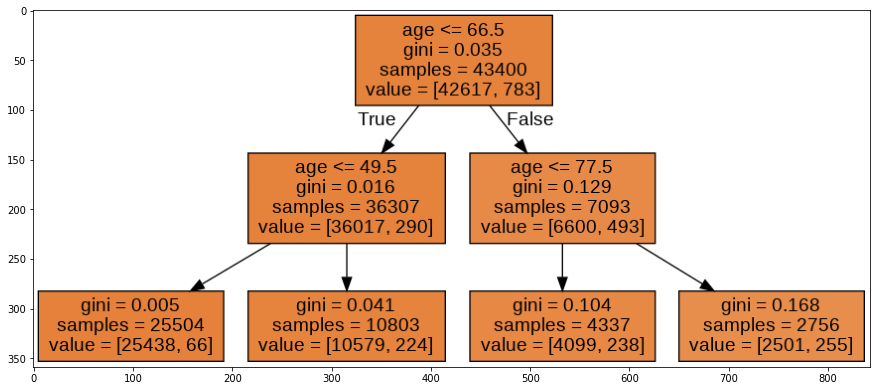

In [10]:
import matplotlib.pyplot as plt
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

We can See that The Decision Tree selects 49.5, 66.5 and 77.5 as the splitting point of the data.

In [11]:
bins = [0, 49.5, 66.5, 77.5, 100]
age_category = [1, 2, 3, 4]

In [12]:
df['age_category'] = pd.cut(df.age, bins, labels = age_category)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,1
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,2
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,3
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,1
